In [1]:
import pandas as pd
import os
from collections import Counter
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import matplotlib as mpl
mpl.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
mpl.rc('axes',unicode_minus = False)
from PIL import Image

from konlpy.tag import Mecab
mecab = Mecab()
import googlemaps
from datetime import datetime

C:\Users\ps712\AppData\Local\Temp\ipykernel_33764\3453698136.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [2]:
# excel불러오기
a1 = pd.read_excel('completed.xlsx')
print(len(a1))
# noreview 행 삭제
a2= a1[a1['review'] != '[[\'No review\']]']
a2= a2.dropna(subset=['review'])
print(len(a2))

# 정제 후 한글단어만 추출
review_list = a2['review'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","")
stop_words =['별표', '개','번역','이','는','고','은','하','가','도','좋','에','한','있','을',
            '다','습니다','먹','어요','었','의','음','게','를','들','지','지만','는데','않','곳',
            '기','어','적','수','너무','으로','에서','것','했','만','과','입니다','없','나','네요',
            '았','많','로','원문','와','아요','합니다','같','시','아','안','인','좀','분','양',
            '서','주','함','되','어서','잘','할','보','더','라','듯','해서','해','보다','거','싶',
            '요','때','그','편','번','원','비','니','던','내','아니','중','겠','님','또','오','였',
            '해요','아서','정도','하나','아주','두','말','갔','으면','여기','다고','다른',
            '요리','그냥','매우','까지','길','랑','긴','데','인데']
words = []
for sentence in review_list:
    words.append([word for word in mecab.morphs(sentence) if not word in stop_words])

words_all = [item for sublist in words for item in sublist] 

840
750


C:\Users\ps712\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


In [3]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(words_all)

threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0 
rara_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value
    
    if value < threshold:
        rare_cnt += 1
        rare_freq = rara_freq + value
        
print("전체 단어 수: ", words_cnt)
print("빈도가 {} 이하인 희귀 단어수 : {}".format(threshold-1, rare_cnt))
print("희귀단어비율 :{}".format((rare_cnt /words_cnt)*100))
print("희귀단어 등장빈도비율:{}".format((rare_freq / words_freq)*100))

전체 단어 수:  39433
빈도가 2 이하인 희귀 단어수 : 24425
희귀단어비율 :61.94050668222047
희귀단어 등장빈도비율:0.0001417852463944012


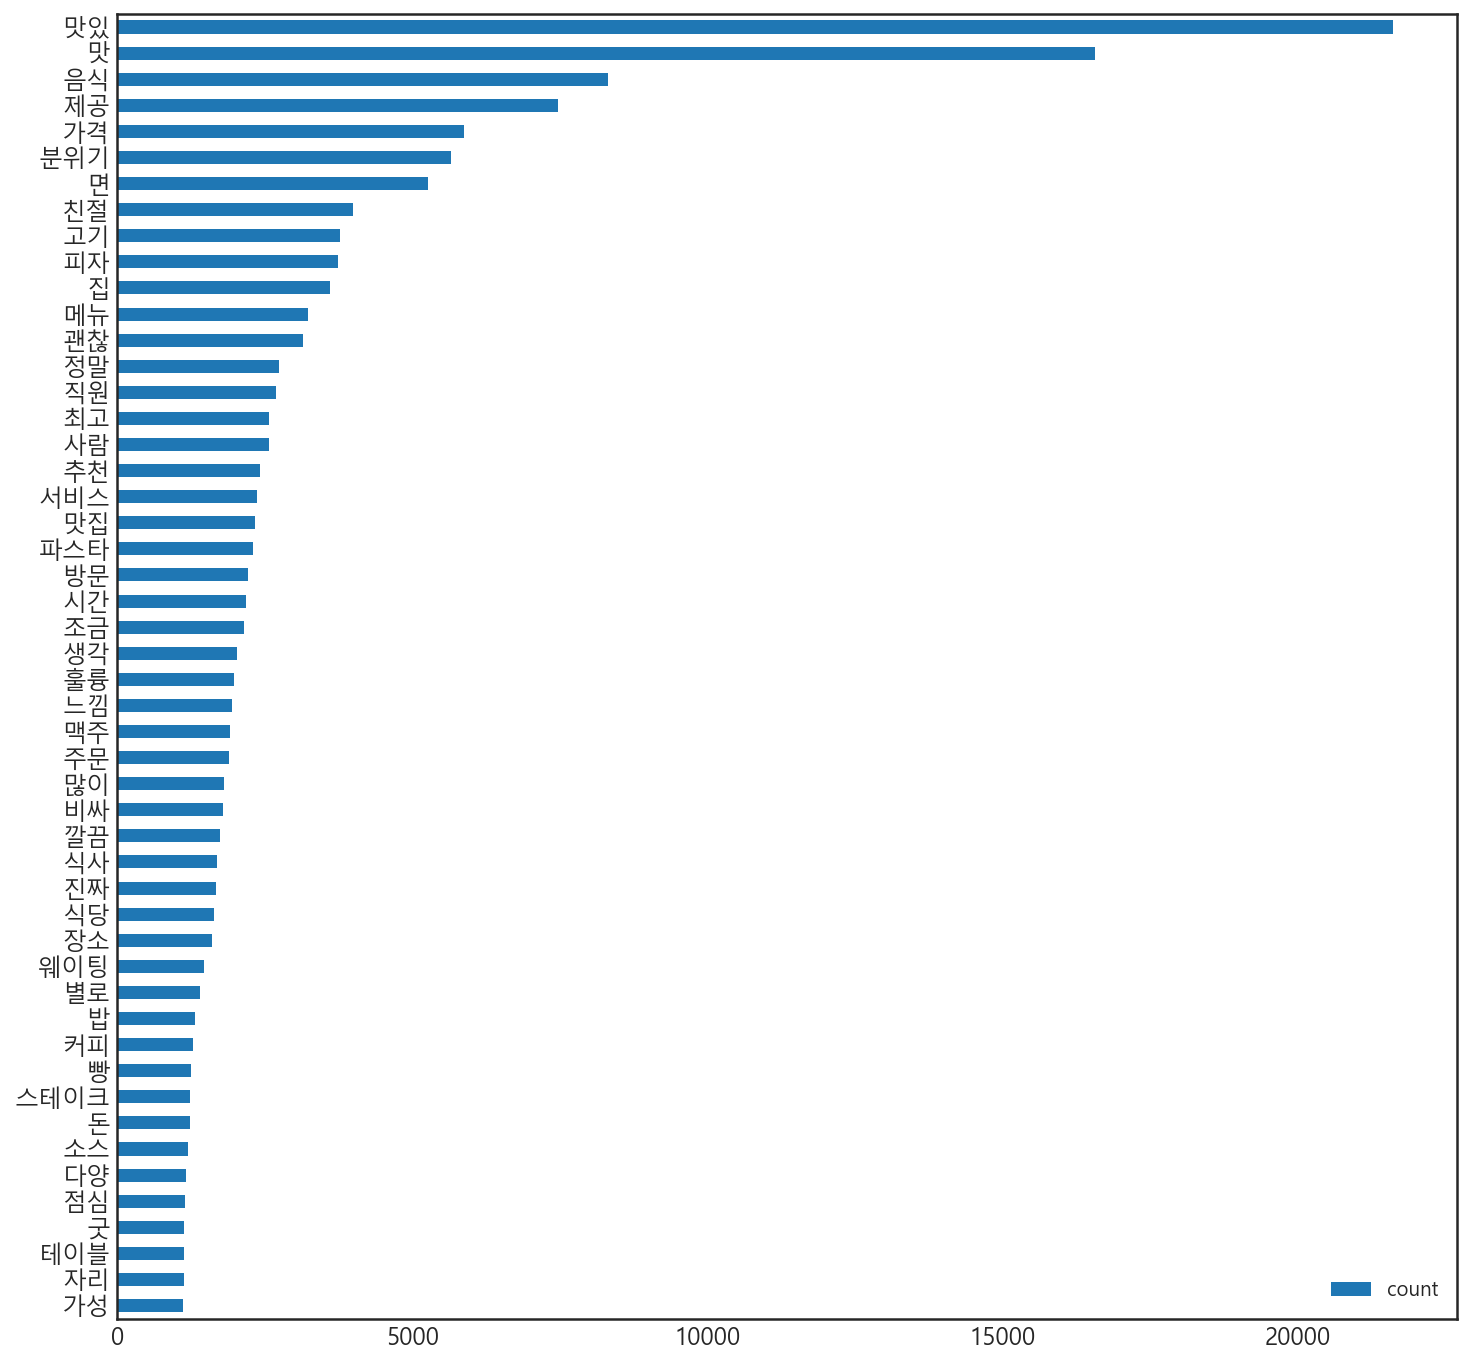

In [4]:
nouns_counter = Counter(words_all)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns = dict(sorted(top_nouns.items(), key=lambda x: x[1], reverse=True))
df = pd.DataFrame.from_dict(top_nouns, orient='index')
df.columns = ['count']
ax= df.plot.barh(figsize=(12,12),fontsize=12).invert_yaxis()

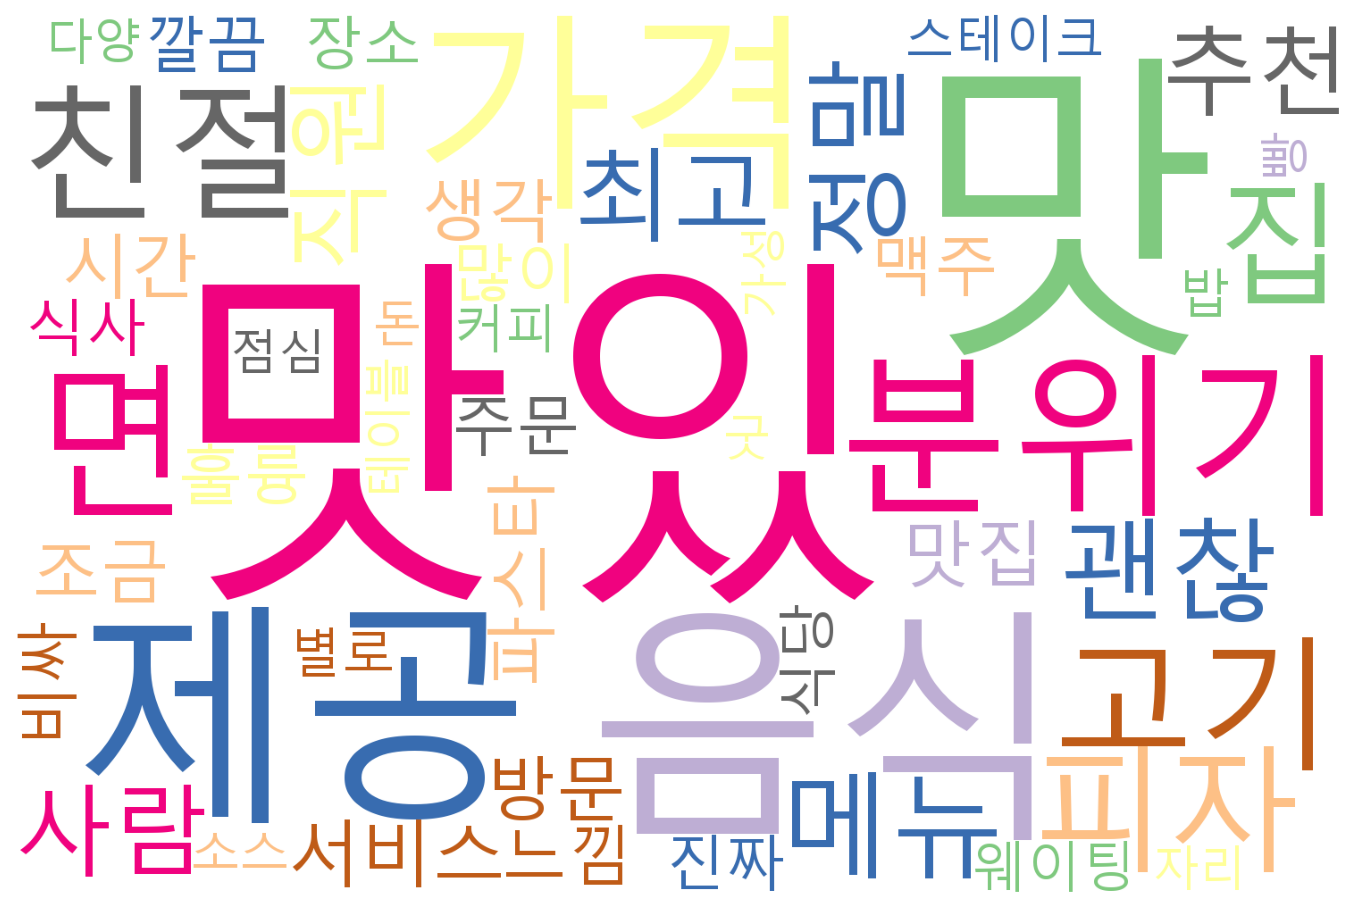

In [5]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000)
wordcloud.generate_from_frequencies(top_nouns)

figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wordcloud)
plt.show()

In [6]:
# 소개팅 관련 단어만 추출
extract_words =['분위기','야경','데이트','애인','소개팅','조용','소개','여자친구','기념일','경치','운치','전망','이쁘','이쁘다','예쁘','예쁘다']
sogaeting_words = []
for sentence in review_list:
    sogaeting_words.append([word for word in mecab.morphs(sentence) if word in extract_words])

In [7]:
#소개팅 단어 갯수 카운트
count =[]
for i in sogaeting_words:
    a = Counter(i)
    count.append(sum(a.values()))
#1개이상인것만 저장
a2['count'] = count
a2 = a2[a2['count'] > 1]


In [8]:
#지오코딩
add_list = a2['address'].to_list()
lat_list =[]
lng_list =[]
gmaps = googlemaps.Client(key='')

for i in add_list:    
        geocode_result = gmaps.geocode(i, language='ko')
        n_lat = geocode_result[0]['geometry']['location']['lat']
        n_lng = geocode_result[0]['geometry']['location']['lng']
        lat_list.append(n_lat)
        lng_list.append(n_lng)
      
a2['lat'] = lat_list
a2['lng'] = lng_list

In [9]:
a2.to_excel('counted.xlsx')